** Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced.**

![IBM HR Attrition](https://harver.com/wp-content/uploads/2019/02/Employee-Attrition-Turnover-1024x437.jpg)

# Loading the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Checking for Null values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset.

In [6]:
cat_col = df.select_dtypes(include="object")

In [7]:
cat_col.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

# Numerical Feature Analysis

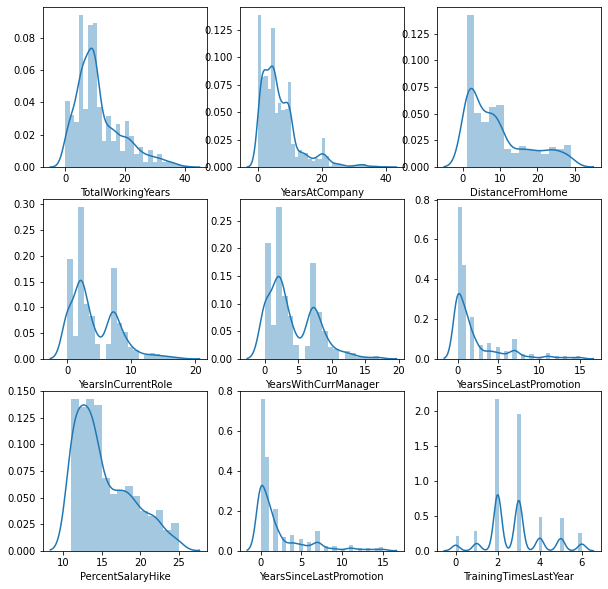

In [8]:

fig,ax = plt.subplots(3,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

# Analysing Categorical with the Dependant Variable

In [9]:
cat_col.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

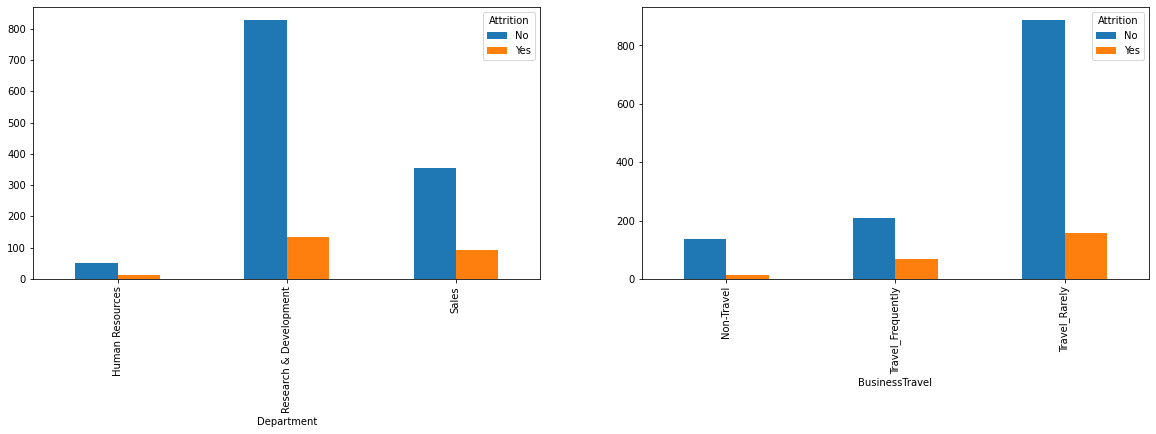

In [10]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
pd.crosstab(df['Department'],df['Attrition']).plot(kind='bar',ax=axes[0])
pd.crosstab(df['BusinessTravel'],df['Attrition']).plot(kind='bar',ax=axes[1])
plt.show()

***
- `Department`: Research and Development department has high attrition compared to other departments
- `BusinessTravel`: Male employees quit more than the female employees.
***

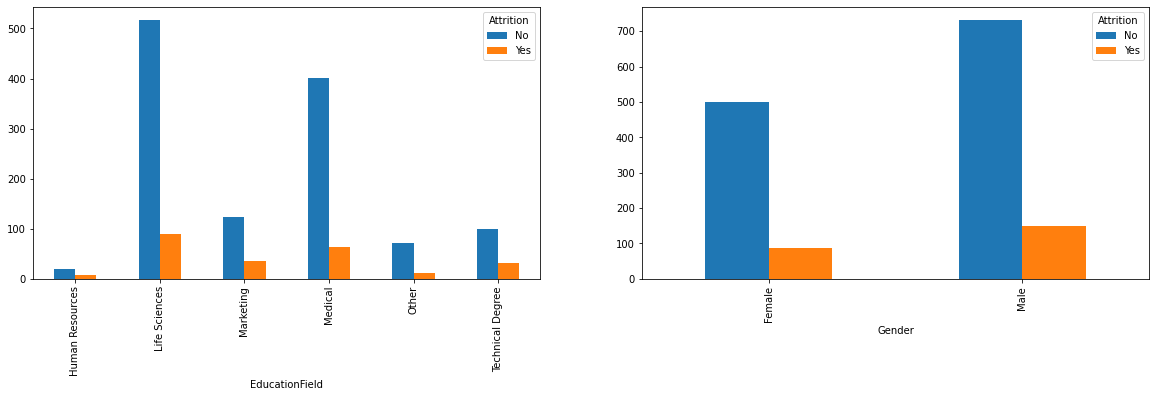

In [11]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
pd.crosstab(df['EducationField'],df['Attrition']).plot(kind='bar',ax=axes[0])
pd.crosstab(df['Gender'],df['Attrition']).plot(kind='bar',ax=axes[1])
plt.show()

***
- `EducationField`: people who opted for Life Science has high attrition compared to others.
- `Gender`: Male employees quit more than the female employees.
***

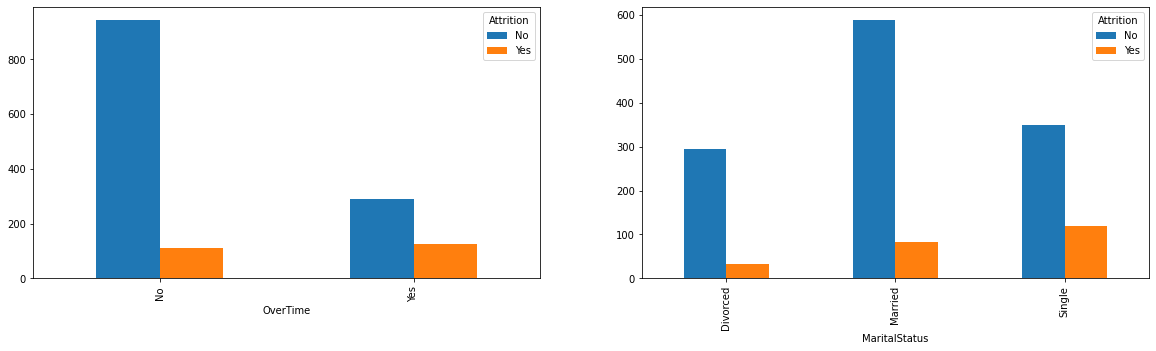

In [12]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
pd.crosstab(df['OverTime'],df['Attrition']).plot(kind='bar',ax=axes[0])
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind='bar',ax=axes[1])
plt.show()

***
- `Overtime`: people who work overtime are most likely to quit. 
- `Marital Status`: Single people are likely to quit, whereas divorced people have least attrition rate.
***

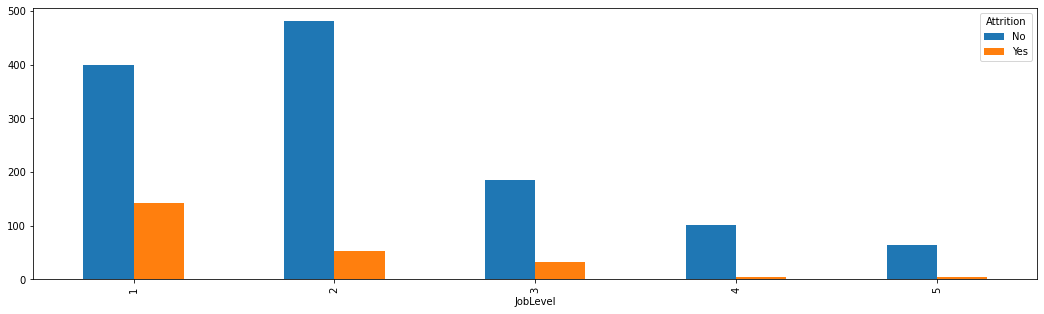

In [13]:
pd.crosstab(df['JobLevel'],df['Attrition']).plot(kind='bar',figsize=(18,5))
plt.show()

`JobLevel`: Joblevel 1 has the more attrition in comparision to other job levels

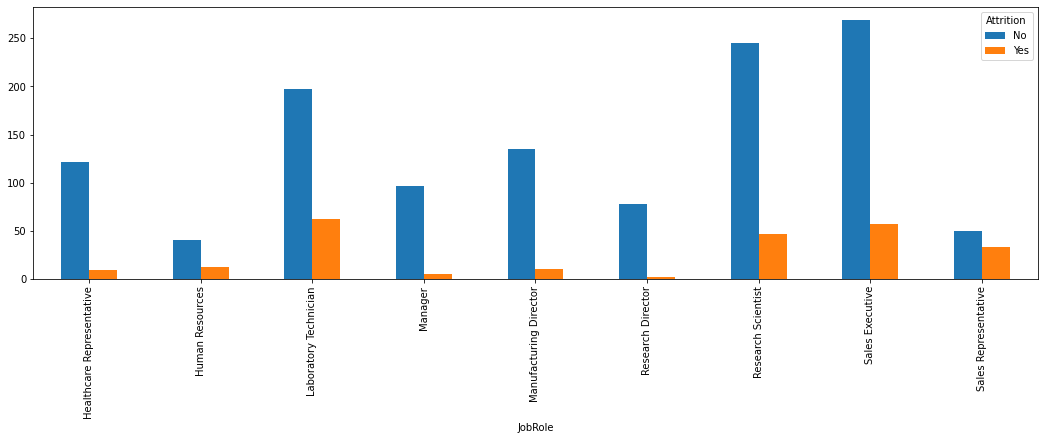

In [14]:
pd.crosstab(df['JobRole'],df['Attrition']).plot(kind='bar',figsize=(18,5))
plt.show()

`Laboratory Technician` are likely to quit compared to others

# Breakdown of distance from home by job role and attrition

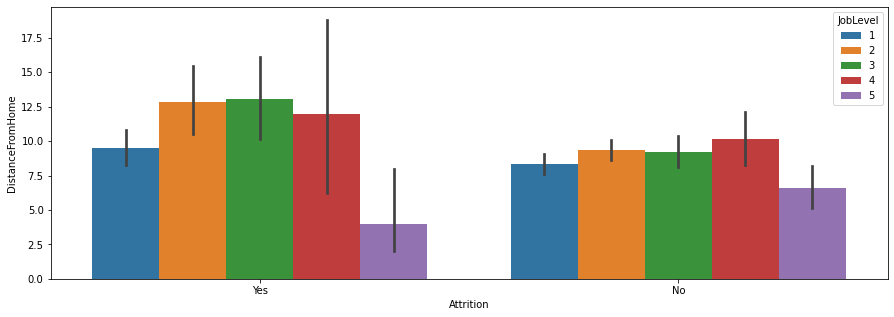

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(df['Attrition'],df['DistanceFromHome'],hue=df['JobLevel'])
plt.show()

Job Level 3 has the most attribution rate when compared to other job levels.

# Comparing Monthly Income with EducationField and Attrition

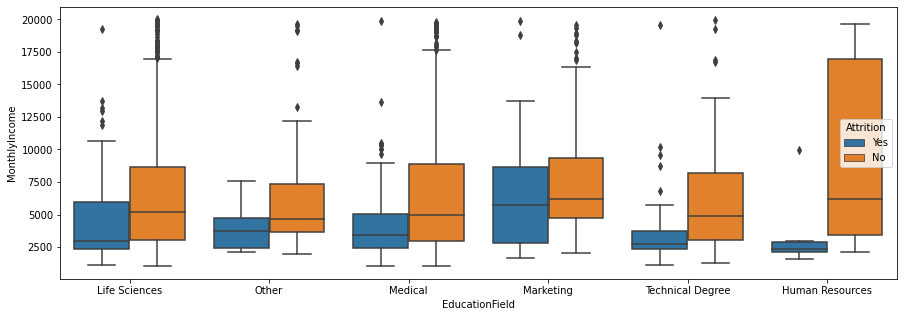

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(df['EducationField'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

Marketing employees are most likely to quit than others, We see that HR field has the least attrition rate also

# Dropping Unwanted columns

In [17]:
df = df.drop(["Over18","EmployeeCount","StandardHours"],axis=1)

# HeatMap

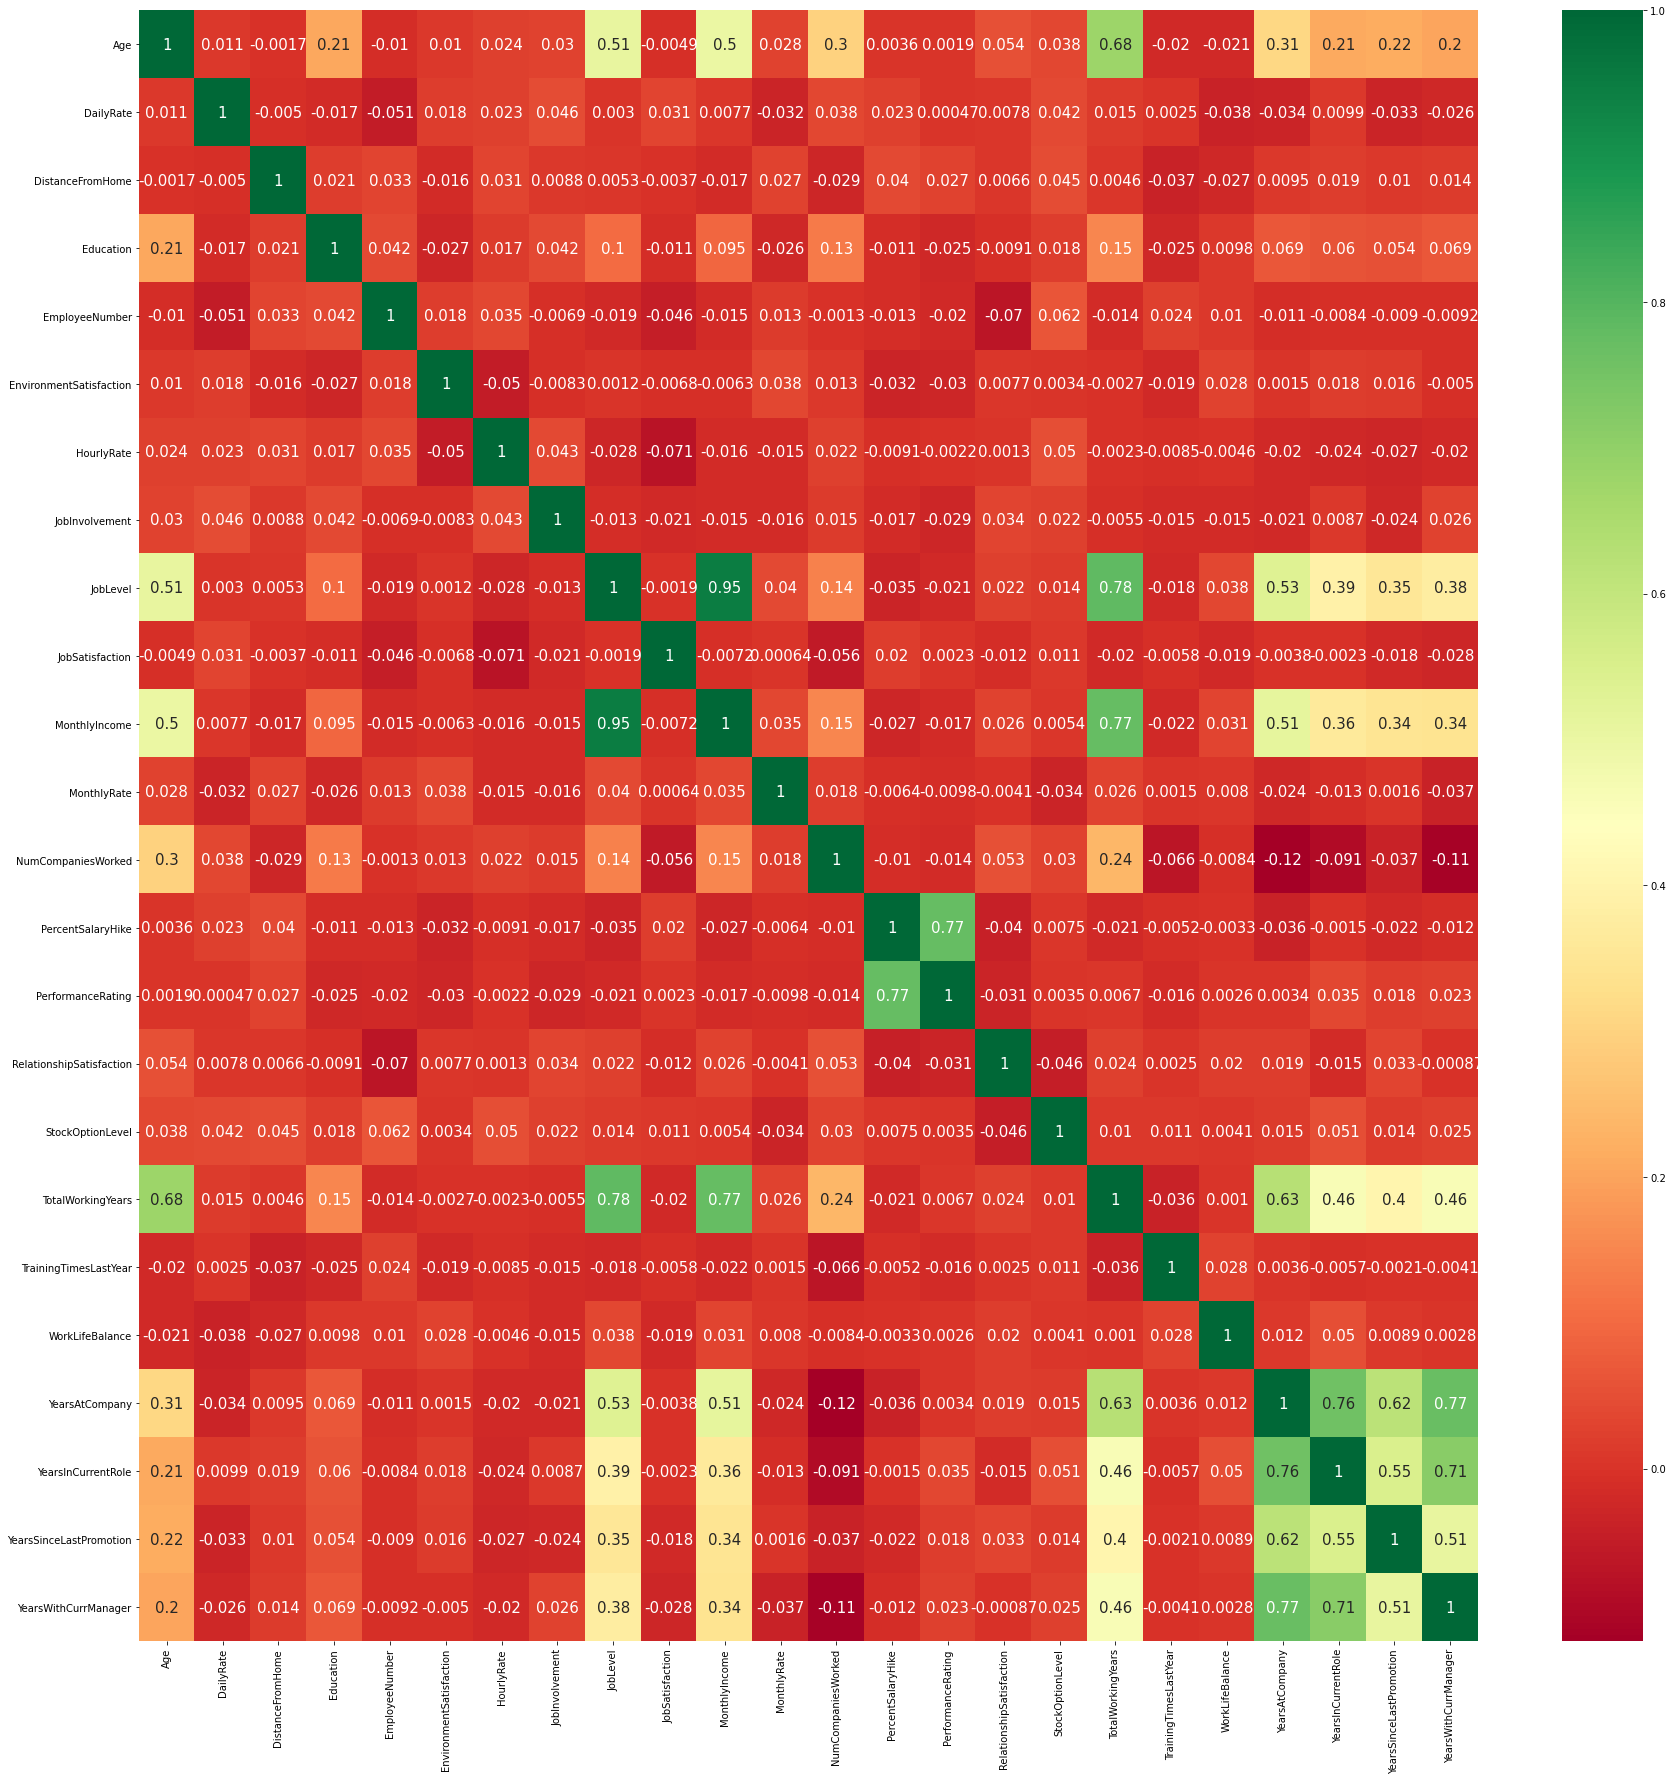

In [18]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn",annot_kws={"size":15})

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
cat_col.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [21]:
cat_col = cat_col.drop(["Attrition","Over18"],axis=1)

In [22]:
df["Attrition"] = df["Attrition"].map({"Yes":1,"No":0})

# Encoding the Categorical Variable

In [23]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

for i in cat_col:
    df[i]=lr.fit_transform(df[i])

In [24]:
df[cat_col.columns].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,2,2,1,0,7,2,1
1,1,1,1,1,6,1,0
2,2,1,4,1,2,2,1
3,1,1,1,0,6,1,1
4,2,1,3,1,2,1,0


# Extracting the independent variables (X) and dependent variable (Y)

In [25]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

#  Split the data into train and test set:(70/30)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10)

In [28]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [29]:
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[0,1]

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
print("Decision Tree Accuracy Score for Train", accuracy_score(y_train, y_train_pred))

Decision Tree Accuracy Score for Train 1.0


The model is overfitting we must do hyperparameter tuning.

# Hyperparamater Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
max_depth=[2,3,4,5,6,7,8,10,15,20]
min_samples_split=[2,3,4,5]
min_samples_leaf=[6,7,8,9,10,11,12,13,14,15,16,17,18]
criterion = ['gini','entropy']
param_grid={'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
dtc = DecisionTreeClassifier(random_state=10)
gridSearchCV = GridSearchCV(dtc, param_grid =param_grid,scoring='accuracy',n_jobs=-1,cv=3)

In [32]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [33]:
gridSearchCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

# Applying the best parameters to the Decision Tree 

In [34]:
dtc = DecisionTreeClassifier(**gridSearchCV.best_params_)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

In [35]:
print("Decision Tree Accuracy Score for Train", accuracy_score(y_train, y_train_pred))

Decision Tree Accuracy Score for Train 0.8824101068999028


In [36]:
y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]
print("Decision Tree Accuracy Score for Train", accuracy_score(y_test, y_test_pred))

Decision Tree Accuracy Score for Train 0.8299319727891157


In [37]:
confusion_matrix(y_test,y_test_pred)

array([[353,  11],
       [ 64,  13]])

In [38]:
dfpr, dtpr, dthreshold = roc_curve(y_test, y_test_prob)

# ROC AUC Score for Decision Tree

In [39]:
roc_auc_score(y_test, y_test_prob)

0.6944484087341231

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_train_pred = rfc.predict(X_train)
rfc_y_train_prob = rfc.predict_proba(X_train)[:,1]

In [41]:
print("Random Forest Classifier Accuracy Score for Train", accuracy_score(y_train, rfc_y_train_pred))

Random Forest Classifier Accuracy Score for Train 1.0


# Hyper Paramter Tuning for Random Forest Classifier

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# rfc = RandomForestClassifier(random_state=10)
params = {
    'n_estimators':sp_randint(5,150),#nooftrees
    'max_features':sp_randint(1,31),#choose any values betwenn 1-31 features excluding Attrition
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'criterion':['gini','entropy']
}
rsearch = RandomizedSearchCV(rfc, param_distributions=params, n_iter=100, scoring='roc_auc',cv=3, n_jobs=-1)

In [43]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [44]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 37,
 'n_estimators': 124}

In [45]:
rfc = RandomForestClassifier(**rsearch.best_params_,random_state=10)
rfc.fit(X_train, y_train)
rfc_y_train_pred = rfc.predict(X_train)
rfc_y_train_prob = rfc.predict_proba(X_train)[:,1]

# Accuracy Score for Random Forest Classifier(RFC)

In [46]:
print("Random Forest Classifier Accuracy Score for Train", accuracy_score(y_train, rfc_y_train_pred))

Random Forest Classifier Accuracy Score for Train 0.8717201166180758


In [47]:
rfc_y_test_pred = rfc.predict(X_test)
rfc_y_test_prob = rfc.predict_proba(X_test)[:,1]
print("Random Forest Classifier Accuracy Score for Test", accuracy_score(y_test, rfc_y_test_pred))

Random Forest Classifier Accuracy Score for Test 0.8344671201814059


# Confusion Matrix

In [48]:
confusion_matrix(y_test,rfc_y_test_pred)

array([[362,   2],
       [ 71,   6]])

# ROC AUC Score for RFC

In [49]:
roc_auc_score(y_test,rfc_y_test_prob)

0.7993435136292278

In [50]:
rfpr,rtpr,rthreshold = roc_curve(y_test, rfc_y_test_prob)

# Analysis of Decision Tree and Random Forest Classifier

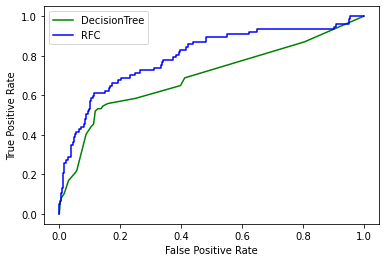

In [51]:
plt.plot(dfpr,dtpr,c='g',label='DecisionTree')
plt.plot(rfpr,rtpr,c='b',label='RFC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()

RFC model has a bettery accuracy and roc_auc_score compared to the decision Tree

# Top features according to RFC Model

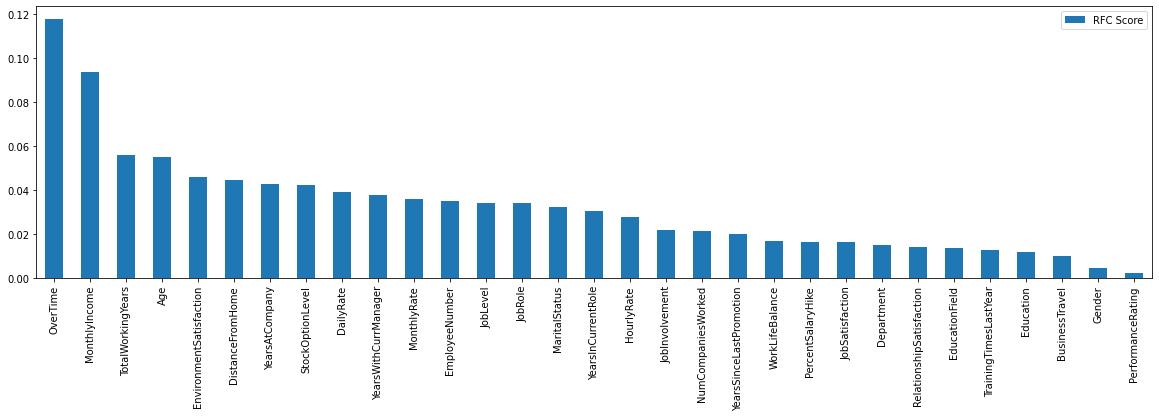

In [52]:
rfc_fi = pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['RFC Score'])
rfc_feat = rfc_fi.sort_values(by='RFC Score',ascending=False)
rfc_feat.plot(kind='bar',figsize=(20,5))
plt.show()